# Introduction to Multilayer Perceptrons - Part 2

### Contents

* Backpropagation
* Gradient Descent
* Activation Functions
* Tensorflow and Keras
* Load and process data
* Creating the model
* Training the model
* Model accuracy
* Exercises

In the previous exercise we learned about perceptrons. In this exercise we will introduce backpropagation, Gradient Descent and setting up a multilayer perceptron for the Iris Dataset.

## Backpropagation

Assume we have a simple neural network for classification consisting of layers of perceptrons, an example of which is shown below. These are known as *Feed-Forward Neural Networks*, as information only goes in one direction. 

We assume that each layer has a bias input, which is not shown.

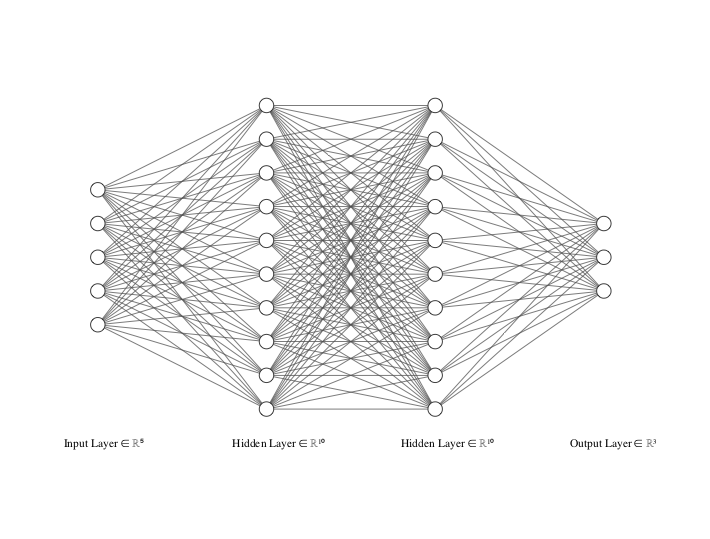

Each node will have weights, corresponding to the number of inputs including biases. For example, in the above model we have that there are 203 weights to determine. For each of the 10 nodes in the first hidden layer there are 6 inputs, for the 10 nodes in the second hidden layer there are 11 inputs and for the 3 nodes in the output layer there are 11 inputs. Training the neural network then corresponds to calculating the optimal weights such that the inputs best model the output. 

Training the neural network is the most computationally intensive component of neural networks. The basis of training is an algorithm called backpropagation. Backpropagation takes a data-set, or a sample of a data-set, and does two sweeps through the neural network. The first is a forward calculation, which is used to calculate the error. This error is summed over all the samples. This is also known as the cost function or loss function. The second is a backward calculation, hence the name of the algorithm, where the change in the error is propagated back through the network. This uses the chain rule to calculate the partial derivatives of the error with respect to each of the weights.

## Gradient Descent

Once the derivative of the error with the respect to the weights is known, we then have a gradient field, and gradient descent can be used to update the weights. If the model has $n$ parameters (the weights), then we can write the gradient of the error $E$ as

$$ 
\nabla E = \left( \frac{\partial E}{\partial w^{(1)}}, \frac{\partial E}{\partial w^{(2)}}, \dots , \frac{\partial E}{\partial w^{(n)}} \right). 
$$

Then the weights, which we can write as ${\bf w} = ( w^{(1)}, w^{(2)}, \dots , w^{(n)} )$, can be updated using the rule

$$ {\bf w}^{(\text{next})} = {\bf w} - \eta \nabla E. $$

The parameter $\eta$ is known as the learning parameter. This corresponds to choosing the direction that the error is decreasing the fastest and heading in that direction. The hope is that this will eventually take us to the minimum of the error, and if this is the global minimum, then this will give the optimal weights. Choosing the best value of $\eta$ is the key to making neural network training as efficient as possible. If the value is too small, the algorithm is very slow to converge, however if it is too large the algorithm will overshoot the minimum and may not converge. Hence, it is better to make the learning parameter too small, rather than too large. There are many algorithms for choosing the learning rate, however we will concentrate here on some simple methods.

The algorithm where we use the whole training set to calculate the partial derivatives is know as batch gradient descent. If the training set is very large the cost can very large, as we must perform forward passes for each data instance. For **stochastic gradient descent** a single random data instance is chosen to calculate the gradient. **Mini-batch gradient descent** uses a small, randomly chosen batch of the training set to calculate the gradient.

Stochastic gradient descent and mini-batch gradient descent require significantly less computational time than batch gradient descent, however they introduce a randomness to the descent method which means the error can bounce around and never reach a minimum. This behaviour decreases as the size of the batch increases. In some cases where the cost function is irregular, this behaviour of the error bouncing around can be a benefit, as it moves the error away from local minimum.

One way to address this bouncing around of the error is to gradually reduce the learning rate. For example, the learning rate can be defined as 

$$ LR = \frac{\alpha}{1+\beta n}, $$

where $\alpha$ is the initial learning rate, $\beta$ is the decay rate and $n$ is the number of **epochs** (iterations of the training algorithm).

## Activation Functions

One final change needs to be made to the algorithm as it currently stands. The activation function for a classical perceptron is the Heaviside step function

$$ H(x) = \left\{ \begin{array}{ll} 0 \quad & x < 0, \\ 1 & x \ge 0. \end{array} \right. $$

Hence if the argument is less than zero the perceptron does nothing, and if it is greater than zero the perceptron fires.

The problem with this function is that the function is singular at $x=0$, and otherwise the gradients are zero. Consequently, the gradient of the error will in most places be zero, and gradient descent will fail.

To fix this problem smooth activation functions are used. A number of common choices are:

### Sigmoid function

The sigmoid function is

$$ \sigma (x) = \frac{1}{1+e^{-x}}. $$

This is a smoothed version of the Heaviside step function.

### Tanh function

The hyperbolic tangent function is

$$ \tanh (x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} = 2\sigma(2x)-1. $$

This has similar shape to the sigmoid function, but approaches $-1$ as $x\to -\infty$ and $1$ as $x\to \infty$.

### ReLU function

The Rectified Linear Unit function is the integral of the Heaviside step function:

$$ ReLU(x) = \hbox{max}(0,x) = \left\{ \begin{array}{ll} 0 \quad & x < 0, \\ x & x \ge 0. \end{array} \right. $$

Even though this function increases without bounds for $x$ positive, it is fast to compute and works well with the gradient descent algorithm. Consequently, it has become the default for Artificial Neural Networks.

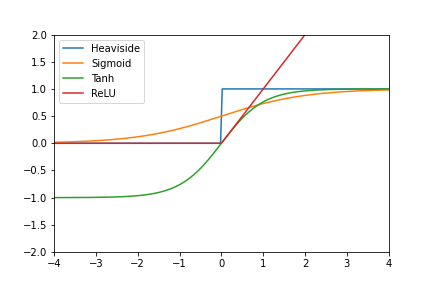

## Output functions

Here we will concentrate on a multilabel regression problem, therefore the output we need to calculate is the probability that a
prediction belongs to a particular class. This can be done using the _softmax_ function, which we have previously seen with the logistic regression algorithm. If ${\bf s({\bf x})}$ is a vector with the scores for each class, then the proability that instance ${\bf x}$ belongs to be class $k$ is

$$ p_k = \frac{ \exp (s_k ({\bf x}))}{ \sum_{j=1}^K \exp (s_j ({\bf x}))}, $$

where there are $K$ classes.

Finally the error function can be calculated. If $y_k^{(i)}$ is the probability that the $i^{th}$ instance belongs to class $k$, which is in general either $0$ or $1$, then the cross-entropy cost function is

$$ E = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)}\log (p_k^{(i)}). $$

Since $p_k^{(i)} \le 1$, this function is always non-negative and only equal to 0 if $p_k^{(i)} = y_k^{(i)} $ for all $k$. 

## Tensorflow and Keras

Tensorflow is an open-source Deep Learning library which was developed by Google, and is the most popular Deep Learning Library. Keras is high level Deep Learning interface which can run on top of a number of Deep Learning libraries, including Tensorflow, Microsoft Cognitive Toolkit, PyCharm and Theano. However, here we will use the implementation of Keras which is built in to Tensorflow. 

A *tensor* is just a higher-dimensional matrix.

First we import Tensorflow, and then import the implementation of Keras.

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-09-14 09:58:18.218902: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


To test whether they are imported correctly, we can check the version numbers.

In [2]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


We import from `sklearn` functions to load the Iris data set, split off the data for training and testing, and analyse the output. From `keras` we introduce the functions `Sequential`, which creates a feed-forward neural network, `Dense` which creates a fully connected network and `Activation`, which introduces different activation functions. We also introduce `SGD` which implements stochastic gradient descent.

Finally, we introduce the usual suspects for data manipulation and plotting.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tf.autograph.set_verbosity(0)

## Load and process data

We first load the Iris data from `sklearn`. The `data` structure is used for our features, which we then normalize. In general the input data for neural networks should be normalized or scaled.

The `target` values correspond the three categories: 0 - setosa, 1 - versicolor and 2 - virginica. We also store the species names for later analysis.

In [4]:
ds = load_iris()
X = ds['data']
X = (X-X.mean())/X.std()
target_names = ds['target_names']
print(ds['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The target values need to be transformed to a binary categorization for each species. This can be done using `pd.get_dummies`, which creates a column for each category that is either 0 (false) or 1 (true). The result will be a pandas dataframe, however we need to convert that a numpy array so that it can be used by `keras`.

Once the feature and target arrays are created we can split them into training and testing sets. Here the testing set is 20% of the instances.

In [5]:
Y = pd.get_dummies(ds['target']).to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=2)

## Creating the model

For this example we create a sequential neural network where there are 4 inputs (the dimensions of the irises), then two hidden layers which each have 10 nodes and a tanh activation function, and the output layer has 3 outputs (the iris species) and a softmax activation function. The number of hidden layers and the nodes in each hidden layer are arbitrary. All the layers are dense, which means they are fully connected. For the first layer only we need to specify the number of inputs. We can then print out a summary of the model, which shows we have 193 free parameters.

In [6]:
model = Sequential([ Dense(10, input_dim=4, activation='tanh'),
                    Dense(10, activation='tanh'),
                    Dense(3, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


2023-09-14 09:58:29.153295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We could also show a summary by using the `layers` attribute.

In [7]:
model.layers

To find the attributes of a particular layer we can refer to these by an index. For example, index=1 will give the second layer. We can then view the weights and biases for this layer. These are all randomly initialized by `Dense`, otherwise the stochastic gradient descent algorithm will fail.

In [8]:
hidden2 = model.layers[1]
weights, biases = hidden2.get_weights()
print('weights :', weights)
print('biases :', biases)

weights : [[-0.48258984  0.03576589 -0.5410412  -0.3396061  -0.31767058  0.14172554
   0.5189892   0.21254969  0.50593305 -0.19777998]
 [ 0.40206897 -0.47770104  0.44660223 -0.5068061   0.49051595  0.33359778
   0.3555624  -0.07361868  0.23147792 -0.38925287]
 [-0.3034235   0.35591006 -0.20353797  0.28361744 -0.5036908  -0.03271616
  -0.15956193  0.24057811 -0.5249903  -0.00581843]
 [ 0.31574243 -0.13052574  0.10424858  0.43375307  0.0622043  -0.04893196
  -0.05717683  0.44429946  0.47927892  0.43645757]
 [-0.1801886   0.49980855  0.49645448  0.29356217  0.19283164 -0.08535144
   0.5167711  -0.3414718   0.05557925 -0.44286937]
 [-0.08174461 -0.48967654 -0.04988721 -0.06688195 -0.14429015  0.32051802
  -0.30124688 -0.514645   -0.24411705 -0.27995175]
 [-0.00412983 -0.1396825   0.05332059 -0.20200801 -0.30835068 -0.49000484
  -0.17979029 -0.45534658  0.53961575  0.2886806 ]
 [ 0.4908129   0.5217191   0.12576842  0.43122542  0.20831668 -0.12773639
   0.15809625  0.30363137  0.46021903 -0.

The final step to initialize the model is to compile the model, which sets the loss or error function, the optimizer to use and the metrics to output.

Here we use the cross entropy function discussed earlier and Stochastic Gradient Descent with a learning rate ($\alpha$) of 0.02 and a decay rate ($\beta$) of 0.

In [9]:
opt = SGD(learning_rate=0.02, decay=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

## Training the model 

As with `sklearn` we train the model using the `fit` method, and pass the features and target training set. This training set is split into an actual training set and a validation set. In this case we make the validation set 20% of the training set. The validation set is used to independently test the accurary of the model after each epoch. If the training accuracy is significantly higher than the validation accuracy, then this suggests that the model is overfitting the data. An explicit validation set could also be passed using the `validation_data` argument. 

Finally, we fit the model over 500 epochs or iterations. Each of these epochs involves one step of the backpropagation algorithm and stochastic gradient descent. Here we use the default batch size of 32. After each epoch (training iteration) the model outputs the accuracy and loss for the training and validations sets. The accuracy should be increasing towards 1, while the loss should be decreasing to 0. 

The accuracy data of the model is stored in a dictionary called `history`.

In [10]:
# set batch size using keyword batch_size (default is 32)
history = model.fit(X_train, Y_train, epochs=500, validation_split=0.2, batch_size=32)

Epoch 1/500
3/3 [==============================] - 0s 53ms/step - loss: 1.1919 - accuracy: 0.3750 - val_loss: 1.2540 - val_accuracy: 0.2500
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1522 - accuracy: 0.3750 - val_loss: 1.2066 - val_accuracy: 0.2500
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1172 - accuracy: 0.3750 - val_loss: 1.1625 - val_accuracy: 0.2500
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 1.0838 - accuracy: 0.3750 - val_loss: 1.1212 - val_accuracy: 0.2500
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 1.0522 - accuracy: 0.3750 - val_loss: 1.0827 - val_accuracy: 0.2500
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 1.0243 - accuracy: 0.3750 - val_loss: 1.0468 - val_accuracy: 0.2500
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 0.9966 - accuracy: 0.3750 - val_loss: 1.0133 - val_accuracy: 0.2500
Epoch 8/500
3/3 [=========

3/3 [==============================] - 0s 8ms/step - loss: 0.4886 - accuracy: 0.9167 - val_loss: 0.4287 - val_accuracy: 0.9583
Epoch 60/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4847 - accuracy: 0.9167 - val_loss: 0.4247 - val_accuracy: 0.9583
Epoch 61/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4799 - accuracy: 0.9167 - val_loss: 0.4208 - val_accuracy: 0.9583
Epoch 62/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4770 - accuracy: 0.9167 - val_loss: 0.4171 - val_accuracy: 0.9583
Epoch 63/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4725 - accuracy: 0.9167 - val_loss: 0.4133 - val_accuracy: 0.9583
Epoch 64/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4681 - accuracy: 0.9167 - val_loss: 0.4096 - val_accuracy: 0.9583
Epoch 65/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4646 - accuracy: 0.9167 - val_loss: 0.4059 - val_accuracy: 0.9583
Epoch 66/500
3/3 [===============

3/3 [==============================] - 0s 7ms/step - loss: 0.3166 - accuracy: 0.9479 - val_loss: 0.2616 - val_accuracy: 0.9583
Epoch 118/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3148 - accuracy: 0.9479 - val_loss: 0.2593 - val_accuracy: 0.9583
Epoch 119/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3130 - accuracy: 0.9479 - val_loss: 0.2572 - val_accuracy: 0.9583
Epoch 120/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.9479 - val_loss: 0.2552 - val_accuracy: 0.9583
Epoch 121/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3079 - accuracy: 0.9479 - val_loss: 0.2531 - val_accuracy: 0.9583
Epoch 122/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3068 - accuracy: 0.9479 - val_loss: 0.2511 - val_accuracy: 0.9583
Epoch 123/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3040 - accuracy: 0.9479 - val_loss: 0.2490 - val_accuracy: 0.9583
Epoch 124/500
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.2221 - accuracy: 0.9583 - val_loss: 0.1671 - val_accuracy: 0.9583
Epoch 176/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2210 - accuracy: 0.9583 - val_loss: 0.1658 - val_accuracy: 0.9583
Epoch 177/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2191 - accuracy: 0.9583 - val_loss: 0.1646 - val_accuracy: 0.9583
Epoch 178/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2183 - accuracy: 0.9583 - val_loss: 0.1631 - val_accuracy: 0.9583
Epoch 179/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2181 - accuracy: 0.9583 - val_loss: 0.1623 - val_accuracy: 0.9583
Epoch 180/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2175 - accuracy: 0.9583 - val_loss: 0.1616 - val_accuracy: 0.9583
Epoch 181/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2144 - accuracy: 0.9583 - val_loss: 0.1606 - val_accuracy: 0.9583
Epoch 182/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.1674 - accuracy: 0.9688 - val_loss: 0.1169 - val_accuracy: 0.9583
Epoch 234/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1665 - accuracy: 0.9688 - val_loss: 0.1166 - val_accuracy: 0.9583
Epoch 235/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1656 - accuracy: 0.9792 - val_loss: 0.1161 - val_accuracy: 0.9583
Epoch 236/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1657 - accuracy: 0.9792 - val_loss: 0.1162 - val_accuracy: 0.9583
Epoch 237/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1650 - accuracy: 0.9688 - val_loss: 0.1155 - val_accuracy: 0.9583
Epoch 238/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1635 - accuracy: 0.9688 - val_loss: 0.1147 - val_accuracy: 0.9583
Epoch 239/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1636 - accuracy: 0.9688 - val_loss: 0.1143 - val_accuracy: 0.9583
Epoch 240/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.1346 - accuracy: 0.9688 - val_loss: 0.0909 - val_accuracy: 0.9583
Epoch 292/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1341 - accuracy: 0.9792 - val_loss: 0.0914 - val_accuracy: 0.9583
Epoch 293/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1330 - accuracy: 0.9792 - val_loss: 0.0908 - val_accuracy: 0.9583
Epoch 294/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1326 - accuracy: 0.9792 - val_loss: 0.0903 - val_accuracy: 0.9583
Epoch 295/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1322 - accuracy: 0.9792 - val_loss: 0.0899 - val_accuracy: 0.9583
Epoch 296/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1321 - accuracy: 0.9792 - val_loss: 0.0902 - val_accuracy: 0.9583
Epoch 297/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1320 - accuracy: 0.9792 - val_loss: 0.0902 - val_accuracy: 0.9583
Epoch 298/500
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.1127 - accuracy: 0.9792 - val_loss: 0.0772 - val_accuracy: 0.9583
Epoch 350/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1125 - accuracy: 0.9792 - val_loss: 0.0776 - val_accuracy: 0.9583
Epoch 351/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1119 - accuracy: 0.9792 - val_loss: 0.0772 - val_accuracy: 0.9583
Epoch 352/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1118 - accuracy: 0.9792 - val_loss: 0.0772 - val_accuracy: 0.9583
Epoch 353/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1117 - accuracy: 0.9792 - val_loss: 0.0764 - val_accuracy: 0.9583
Epoch 354/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1129 - accuracy: 0.9792 - val_loss: 0.0773 - val_accuracy: 0.9583
Epoch 355/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1111 - accuracy: 0.9792 - val_loss: 0.0763 - val_accuracy: 0.9583
Epoch 356/500
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.0987 - accuracy: 0.9792 - val_loss: 0.0692 - val_accuracy: 0.9583
Epoch 408/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1001 - accuracy: 0.9792 - val_loss: 0.0697 - val_accuracy: 0.9583
Epoch 409/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0985 - accuracy: 0.9792 - val_loss: 0.0692 - val_accuracy: 0.9583
Epoch 410/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0980 - accuracy: 0.9792 - val_loss: 0.0684 - val_accuracy: 0.9583
Epoch 411/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0975 - accuracy: 0.9792 - val_loss: 0.0684 - val_accuracy: 0.9583
Epoch 412/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0982 - accuracy: 0.9792 - val_loss: 0.0693 - val_accuracy: 0.9583
Epoch 413/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0986 - accuracy: 0.9792 - val_loss: 0.0699 - val_accuracy: 0.9583
Epoch 414/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.0905 - accuracy: 0.9792 - val_loss: 0.0636 - val_accuracy: 0.9583
Epoch 466/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0894 - accuracy: 0.9792 - val_loss: 0.0638 - val_accuracy: 0.9583
Epoch 467/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0889 - accuracy: 0.9792 - val_loss: 0.0646 - val_accuracy: 0.9583
Epoch 468/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0888 - accuracy: 0.9792 - val_loss: 0.0633 - val_accuracy: 0.9583
Epoch 469/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0885 - accuracy: 0.9792 - val_loss: 0.0628 - val_accuracy: 0.9583
Epoch 470/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0901 - accuracy: 0.9792 - val_loss: 0.0638 - val_accuracy: 0.9583
Epoch 471/500
3/3 [==============================] - 0s 7ms/step - loss: 0.0895 - accuracy: 0.9792 - val_loss: 0.0650 - val_accuracy: 0.9583
Epoch 472/500
3/3 [========

The loss and accuracy of the training and validation sets can now be plotted as a function of the epochs of the model. The behaviour looks reasonable where there is no significant difference between the testing and validation data, and the accuracy is generally monotonically increasing, while the loss is monotonically decreasing.

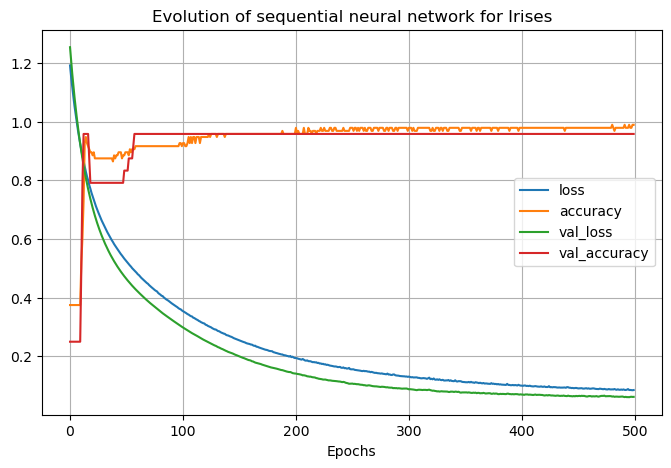

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epochs')
plt.title('Evolution of sequential neural network for Irises');

## Model accuracy

Finally we can use the testing set to determine the accuracy of the model. This can be done using the `evaluate` function for the model. As can be seen the accuracy for the test set is consistent with the accuracy of the validation set.

In [12]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.0707 - accuracy: 0.9667


[0.07073154300451279, 0.9666666388511658]

We can also investigate other measures of the accuracy using the actual classifications of the model. The model predicts the probability of a particular classification. To find the actual classification we then just need to find the column in each row with the maximum probability using the function `argmax()`. Recall that for a particular species $TP$ is the number of true positives, $FP$ is the number of false positives and $FN$ is the number of false negatives. Then the precision, recall and F1-score are respectively

$$ P=\frac{TP}{TP+FP}, \quad R=\frac{TP}{TP+FN}, \quad F_1 = \frac{2PR}{P+R}. $$

The precision gives an indication of what percentage of the predictions of that species are correct, while the recall gives an indication of what percentage of the actual samples for that species are predicted correctly. The F1-score gives a weighted average of the precision and recall. For a perfect model all of these would be 1.

The support is the number of actual samples for that species.

As can be seen, the model gets the prediction of setosa correct, and the precision for virginica and recall for versicolor.

In [13]:
proba = model.predict(X_test)
print(classification_report(proba.argmax(axis=1), Y_test.argmax(axis=1), 
                            target_names=target_names))

1/1 [==============================] - 0s 44ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



The overall accuracy can also be investigated by plotting the confusion matrix for the classsifications. Here we see there is only one incorrect prediction of versicolor, when the species is actually virginica.

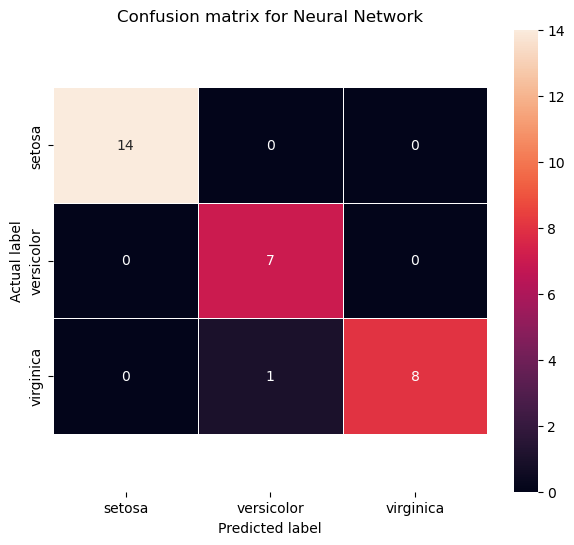

In [14]:
def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Plots a sklearn confusion matrix with categories 'cats' for a classifier 'method'
    """
    # write the confusion matrix to a dataframe with row and column names as the categories, which are already defined
    cmatrix = pd.DataFrame(cnf_matrix,columns=cats,index=cats) 
    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for '+method) # add a title, + concatenates two strings
    plt.ylabel('Actual label') # add a ylabel
    plt.xlabel('Predicted label') # add a xlabel
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

cnf_matrix = confusion_matrix(proba.argmax(axis=1), Y_test.argmax(axis=1)) # create a confusion matrix for our actual and predicted values
plt_confusion_matrix(cnf_matrix, target_names, 'Neural Network')

## Exercises

### Exercise 1 (2 marks)

Create a sequential model for the same data set with one hidden layer with 50 nodes and a ReLU activation layer. 

In [15]:
model0=Sequential([Dense(50,input_dim=4,activation='relu'),Dense(3,activation='softmax')])

### Exercise 2 (2 marks)

Compile this model with a learning rate of 0.05 and a decay rate of 0.001.

In [16]:
optimizer=SGD(learning_rate=0.05,decay=0.001)
model0.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

### Exercise 3

Train this model using the same parameters as for the previous model.

In [17]:
hist=model0.fit(X_train,Y_train,epochs=500,validation_split=0.2)

Epoch 1/500
3/3 [==============================] - 0s 37ms/step - loss: 1.0197 - accuracy: 0.3542 - val_loss: 1.0177 - val_accuracy: 0.3333
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 0.9898 - accuracy: 0.3542 - val_loss: 0.9801 - val_accuracy: 0.4167
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 0.9613 - accuracy: 0.4062 - val_loss: 0.9447 - val_accuracy: 0.5833
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 0.9351 - accuracy: 0.5104 - val_loss: 0.9121 - val_accuracy: 0.6667
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 0.9090 - accuracy: 0.6146 - val_loss: 0.8816 - val_accuracy: 0.7083
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 0.8881 - accuracy: 0.6354 - val_loss: 0.8527 - val_accuracy: 0.7500
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 0.8669 - accuracy: 0.6667 - val_loss: 0.8262 - val_accuracy: 0.7500
Epoch 8/500
3/3 [=========

3/3 [==============================] - 0s 7ms/step - loss: 0.4445 - accuracy: 0.9062 - val_loss: 0.3701 - val_accuracy: 0.9583
Epoch 60/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4396 - accuracy: 0.9062 - val_loss: 0.3667 - val_accuracy: 0.9583
Epoch 61/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4367 - accuracy: 0.9062 - val_loss: 0.3632 - val_accuracy: 0.9583
Epoch 62/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4326 - accuracy: 0.9062 - val_loss: 0.3598 - val_accuracy: 0.9583
Epoch 63/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4291 - accuracy: 0.9062 - val_loss: 0.3564 - val_accuracy: 0.9583
Epoch 64/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4253 - accuracy: 0.9062 - val_loss: 0.3531 - val_accuracy: 1.0000
Epoch 65/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.9062 - val_loss: 0.3498 - val_accuracy: 1.0000
Epoch 66/500
3/3 [===============

3/3 [==============================] - 0s 7ms/step - loss: 0.3102 - accuracy: 0.9375 - val_loss: 0.2451 - val_accuracy: 1.0000
Epoch 118/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3086 - accuracy: 0.9375 - val_loss: 0.2437 - val_accuracy: 1.0000
Epoch 119/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3071 - accuracy: 0.9479 - val_loss: 0.2424 - val_accuracy: 1.0000
Epoch 120/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3058 - accuracy: 0.9479 - val_loss: 0.2411 - val_accuracy: 1.0000
Epoch 121/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3043 - accuracy: 0.9479 - val_loss: 0.2398 - val_accuracy: 1.0000
Epoch 122/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3027 - accuracy: 0.9479 - val_loss: 0.2384 - val_accuracy: 1.0000
Epoch 123/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3022 - accuracy: 0.9479 - val_loss: 0.2372 - val_accuracy: 1.0000
Epoch 124/500
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.9479 - val_loss: 0.1830 - val_accuracy: 1.0000
Epoch 176/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2466 - accuracy: 0.9479 - val_loss: 0.1822 - val_accuracy: 1.0000
Epoch 177/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2444 - accuracy: 0.9479 - val_loss: 0.1812 - val_accuracy: 1.0000
Epoch 178/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2439 - accuracy: 0.9479 - val_loss: 0.1803 - val_accuracy: 1.0000
Epoch 179/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2430 - accuracy: 0.9479 - val_loss: 0.1797 - val_accuracy: 1.0000
Epoch 180/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2424 - accuracy: 0.9479 - val_loss: 0.1791 - val_accuracy: 1.0000
Epoch 181/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.9479 - val_loss: 0.1780 - val_accuracy: 1.0000
Epoch 182/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.2070 - accuracy: 0.9479 - val_loss: 0.1445 - val_accuracy: 1.0000
Epoch 234/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2069 - accuracy: 0.9479 - val_loss: 0.1442 - val_accuracy: 1.0000
Epoch 235/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2070 - accuracy: 0.9479 - val_loss: 0.1434 - val_accuracy: 1.0000
Epoch 236/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2062 - accuracy: 0.9479 - val_loss: 0.1429 - val_accuracy: 1.0000
Epoch 237/500
3/3 [==============================] - 0s 6ms/step - loss: 0.2050 - accuracy: 0.9479 - val_loss: 0.1424 - val_accuracy: 1.0000
Epoch 238/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2048 - accuracy: 0.9479 - val_loss: 0.1422 - val_accuracy: 1.0000
Epoch 239/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2041 - accuracy: 0.9479 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 240/500
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.1811 - accuracy: 0.9479 - val_loss: 0.1194 - val_accuracy: 1.0000
Epoch 292/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1806 - accuracy: 0.9583 - val_loss: 0.1189 - val_accuracy: 1.0000
Epoch 293/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1800 - accuracy: 0.9479 - val_loss: 0.1188 - val_accuracy: 1.0000
Epoch 294/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1806 - accuracy: 0.9583 - val_loss: 0.1181 - val_accuracy: 1.0000
Epoch 295/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1799 - accuracy: 0.9479 - val_loss: 0.1178 - val_accuracy: 1.0000
Epoch 296/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1788 - accuracy: 0.9479 - val_loss: 0.1174 - val_accuracy: 1.0000
Epoch 297/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1784 - accuracy: 0.9479 - val_loss: 0.1172 - val_accuracy: 1.0000
Epoch 298/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.1615 - accuracy: 0.9583 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 350/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1612 - accuracy: 0.9688 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 351/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1607 - accuracy: 0.9688 - val_loss: 0.1015 - val_accuracy: 1.0000
Epoch 352/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9688 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 353/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1602 - accuracy: 0.9688 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 354/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1596 - accuracy: 0.9688 - val_loss: 0.1008 - val_accuracy: 1.0000
Epoch 355/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1597 - accuracy: 0.9688 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 356/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.1461 - accuracy: 0.9688 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 408/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1461 - accuracy: 0.9688 - val_loss: 0.0887 - val_accuracy: 1.0000
Epoch 409/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1458 - accuracy: 0.9688 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 410/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1463 - accuracy: 0.9688 - val_loss: 0.0883 - val_accuracy: 1.0000
Epoch 411/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1458 - accuracy: 0.9688 - val_loss: 0.0880 - val_accuracy: 1.0000
Epoch 412/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1449 - accuracy: 0.9688 - val_loss: 0.0880 - val_accuracy: 1.0000
Epoch 413/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1446 - accuracy: 0.9688 - val_loss: 0.0878 - val_accuracy: 1.0000
Epoch 414/500
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.1346 - accuracy: 0.9688 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 466/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1344 - accuracy: 0.9688 - val_loss: 0.0797 - val_accuracy: 1.0000
Epoch 467/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1339 - accuracy: 0.9688 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 468/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1337 - accuracy: 0.9688 - val_loss: 0.0789 - val_accuracy: 1.0000
Epoch 469/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1341 - accuracy: 0.9688 - val_loss: 0.0784 - val_accuracy: 1.0000
Epoch 470/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1331 - accuracy: 0.9688 - val_loss: 0.0783 - val_accuracy: 1.0000
Epoch 471/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1333 - accuracy: 0.9688 - val_loss: 0.0786 - val_accuracy: 1.0000
Epoch 472/500
3/3 [========

### Exercise 4 (2 marks)

Plot the evolution of the loss function and accuracy, for the validation and testing set.

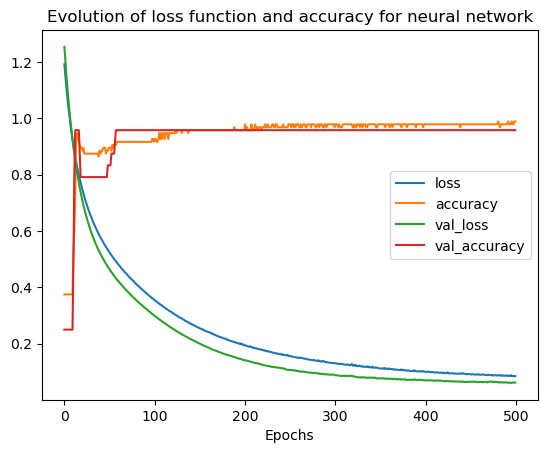

In [22]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.title('Evolution of loss function and accuracy for neural network');

### Exercise 5 (2 marks)

How does the rate of convergence and accuracy of this model compare with the model covered earlier in the notebook. Use the time taken for each cell to run as a guide.

In [23]:
model0.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.0976 - accuracy: 0.9667


[0.09764691442251205, 0.9666666388511658]

The original model takes approximately 35 seconds to train while the new model takes approximately 38 seconds to train

### Generative AI Acknowledgement

If you used generative AI to assist you with these excercises, document your use below following the guidelines here: https://www.monash.edu/learnhq/build-digital-capabilities/create-online/acknowledging-the-use-of-generative-artificial-intelligence